# Checkpoint 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset"

Mounted at /content/drive


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the synthetic data from the CSV file
data_file = drive_dir + "/synthetic_sensor_data.csv"
data = pd.read_csv(data_file)

# Display the first few rows of the dataset
data.head()


,sensor,time,temp,hum,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z
0,2,2024-10-30 19:41:26,6.31,53.53,8.76,2.74,5.21,2.46,2.96,1.50
1,2,2024-10-30 19:41:56,3.98,54.95,0.48,4.86,2.55,1.07,4.50,1.34
2,1,2024-10-30 19:42:26,6.98,61.12,6.98,6.41,2.48,3.65,1.18,0.96
3,3,2024-10-30 19:42:56,8.30,60.43,7.37,1.98,6.25,2.72,0.04,1.55
4,2,2024-10-30 19:43:26,5.92,57.94,9.26,6.63,0.72,2.81,2.43,1.56


In [ ]:
# Select relevant features for clustering (excluding non-numeric or categorical columns)
features = data[['temp', 'hum', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display standardized features
pd.DataFrame(scaled_features, columns=features.columns).head()


,temp,hum,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z
0,-0.649707,-0.214574,0.054441,-0.268949,-0.136281,-0.100860,0.149220,-0.572550
1,-0.785236,-0.032416,-0.391820,-0.155146,-0.279778,-0.786394,0.910369,-0.651749
2,-0.610735,0.759070,-0.041495,-0.071941,-0.283554,0.486037,-0.730548,-0.839846
3,-0.533954,0.670557,-0.020475,-0.309746,-0.080177,0.027370,-1.293996,-0.547800
4,-0.672392,0.351141,0.081389,-0.060132,-0.378500,0.071757,-0.112733,-0.542850


In [ ]:
# Apply DBSCAN
eps = 0.5  # Maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the original data
data['cluster'] = clusters

# Display the distribution of clusters
data['cluster'].value_counts()


,count
cluster,
0,82005
-1,4395


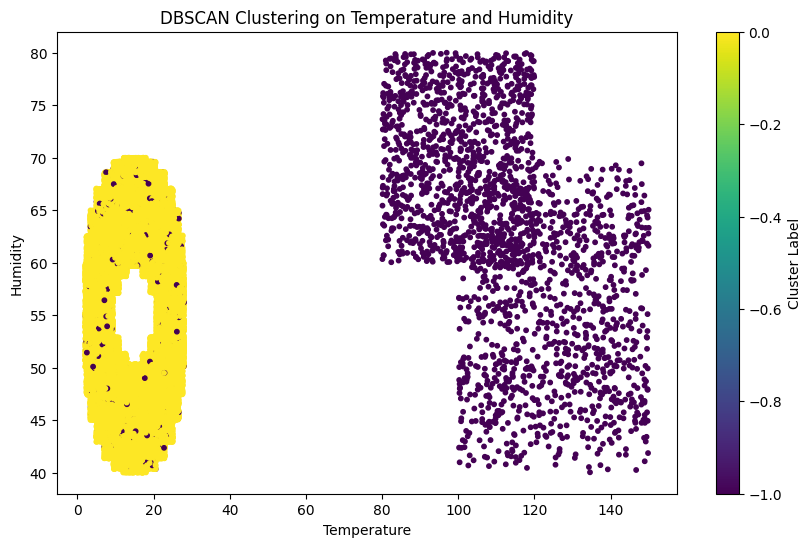

In [ ]:
# Visualize clusters for temperature and humidity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['temp'], data['hum'], c=data['cluster'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster Label')
plt.title('DBSCAN Clustering on Temperature and Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()


In [ ]:
# Extract and display outliers
outliers = data[data['cluster'] == -1]
print(f"Number of outliers detected: {len(outliers)}")
outliers.head()


Number of outliers detected: 4395


,sensor,time,temp,hum,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,cluster
51,4,2024-10-30 20:06:56,7.16,55.87,2.73,1.68,6.48,18.64,13.50,13.24,-1
80,4,2024-10-30 20:21:26,117.82,58.09,1.06,4.69,2.03,4.59,1.83,0.60,-1
109,3,2024-10-30 20:35:56,91.06,68.37,63.26,99.31,85.89,3.04,1.97,3.45,-1
134,1,2024-10-30 20:48:26,4.41,61.15,4.81,3.97,5.49,18.06,14.81,17.66,-1
135,2,2024-10-30 20:48:56,6.37,64.41,122.51,140.70,111.63,2.46,4.90,1.79,-1


In [ ]:
# Specify the directory where you want to save the file
output_directory = "/content/drive/MyDrive/Colab Notebooks/Output"
output_file = f"{output_directory}/synthetic_sensor_data_with_clusters.csv"

# Save the file
data.to_csv(output_file, index=False)

print(f"Clustered data saved to {output_file}")

Clustered data saved to /content/drive/MyDrive/Colab Notebooks/Output/synthetic_sensor_data_with_clusters.csv


## Expert Classification using treshold labeling data

In [ ]:
# Update file path as per user instruction
train_file_path = '/content/drive/MyDrive/Colab Notebooks/Output/synthetic_sensor_data_with_clusters.csv'

# Load the dataset
train_data = pd.read_csv(train_file_path)

# Define thresholds and label the data
def label_data(row):
    if (row['temp'] > 50 or
        row['hum'] > 70 or
        row['gyro_x'] > 50 or row['gyro_y'] > 50 or row['gyro_z'] > 50 or
        row['accel_x'] > 10 or row['accel_y'] > 10 or row['accel_z'] > 10):
        return 1  # Faulty
    return 0  # Normal

# Apply the labeling function
train_data['label'] = train_data.apply(label_data, axis=1)

# Save the labeled data
output_labeled_file = '/content/drive/MyDrive/Colab Notebooks/Output/labeled_synthetic_sensor_data_with_clusters.csv'
train_data.to_csv(output_labeled_file, index=False)

labeled_data = pd.read_csv(output_labeled_file)

labeled_data.head()

,sensor,time,temp,hum,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,cluster,label
0,2,2024-10-30 19:41:26,6.31,53.53,8.76,2.74,5.21,2.46,2.96,1.50,0,0
1,2,2024-10-30 19:41:56,3.98,54.95,0.48,4.86,2.55,1.07,4.50,1.34,0,0
2,1,2024-10-30 19:42:26,6.98,61.12,6.98,6.41,2.48,3.65,1.18,0.96,0,0
3,3,2024-10-30 19:42:56,8.30,60.43,7.37,1.98,6.25,2.72,0.04,1.55,0,0
4,2,2024-10-30 19:43:26,5.92,57.94,9.26,6.63,0.72,2.81,2.43,1.56,0,0


## Prepare Data for Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the labeled dataset
labeled_file = '/content/drive/MyDrive/Colab Notebooks/Output/labeled_synthetic_sensor_data_with_clusters.csv'
data = pd.read_csv(labeled_file)

# Separate features (X) and labels (y)
features = ['temp', 'hum', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z']
X = data[features]
y = data['label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shape of the resulting datasets
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (69120, 8)
Testing Features Shape: (17280, 8)
Training Labels Shape: (69120,)
Testing Labels Shape: (17280,)


## Training

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = classifier.predict(X_test_scaled)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained classifier (model)
model_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/fault_classifier_model.pkl'
joblib.dump(classifier, model_filename)
print(f"Model saved to {model_filename}")

# Save the scaler separately
scaler_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/scaler.save'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16386
           1       1.00      1.00      1.00       894

    accuracy                           1.00     17280
   macro avg       1.00      1.00      1.00     17280
weighted avg       1.00      1.00      1.00     17280

Model saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/fault_classifier_model.pkl
Scaler saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/scaler.save


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = classifier.predict(X_test_scaled)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained classifier (model)
model_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/fault_classifier_model.pkl'
joblib.dump(classifier, model_filename)
print(f"Model saved to {model_filename}")

# Save the scaler separately
scaler_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/scaler.save'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16386
           1       1.00      1.00      1.00       894

    accuracy                           1.00     17280
   macro avg       1.00      1.00      1.00     17280
weighted avg       1.00      1.00      1.00     17280

Model saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/fault_classifier_model.pkl


## Testing

## Example1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Path to the saved model
model_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/fault_classifier_model.pkl'

# Load the trained model
classifier = joblib.load(model_file)

# Load new data (example file path)
new_data_file = 'test_data.csv'
new_data = pd.read_csv(new_data_file)

# Select features from the new data
features = ['temp', 'hum', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z']
X_new = new_data[features]

# Standardize the new data (using the scaler from training)
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Use the model to make predictions
predictions = classifier.predict(X_new_scaled)

# Add predictions to the new data
new_data['prediction'] = predictions

# Save the predicted data
output_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/testing_result.csv'
new_data.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


Predictions saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/testing_result.csv


## Example2

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Path to the saved model
model_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/fault_classifier_model.pkl'

# Load the trained model
classifier = joblib.load(model_file)

# Load new data (example file path)
new_data_file = 'synthetic_sensor_data_3.csv'
new_data = pd.read_csv(new_data_file)

# Select features from the new data
features = ['temp', 'hum', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z']
X_new = new_data[features]

# Standardize the new data (using the scaler from training)
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Use the model to make predictions
predictions = classifier.predict(X_new_scaled)

# Add predictions to the new data
new_data['prediction'] = predictions

# Save the predicted data
output_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/testing_result2.csv'
new_data.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


Predictions saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/testing_result2.csv


In [ ]:
# Re-load the new data with predictions if necessary
output_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint1/testing_result2.csv'
new_data_with_predictions = pd.read_csv(output_file)

# Count the number of predictions with value 1
prediction_count = new_data_with_predictions['prediction'].value_counts().get(1, 0)

print(f"Number of faulty predictions (value 1): {prediction_count}")

Number of faulty predictions (value 1): 4395


# Checkpoint 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the synthetic data from the CSV file
data_file = drive_dir + "/dataset.csv"
data = pd.read_csv(data_file)

# Display the first few rows of the dataset
data.head()


,timestamp,machine_id,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,...,hour,day_of_week,month,shift,machine_type,machine_age,operator_id,material_type,cycle_time,days_since_last_maintenance
0,2024-12-01 03:59:20.687595,1,10.756457,45.054128,0.124568,36.205334,65.404816,11.357421,-6.076538,-6.325126,...,3,6,12,Night,TypeA,3,OP_1,Aluminum,84.385989,25
1,2024-12-01 05:52:48.505225,3,13.754359,52.204922,0.157020,54.522527,-31.346199,-71.258711,1.574431,12.087429,...,5,6,12,Night,TypeB,14,OP_5,Plastic,176.664856,0
2,2024-12-01 02:33:53.146871,0,23.434186,50.910485,0.303358,-99.799619,23.847101,11.707200,-2.401870,-5.902201,...,2,6,12,Night,TypeC,2,OP_1,Steel,157.950294,21
3,2024-12-01 00:43:41.825482,8,12.118907,49.615172,0.147193,-81.591458,-32.330194,-60.217919,4.864684,2.012458,...,0,6,12,Night,TypeA,6,OP_5,Composite,120.474039,2
4,2024-12-01 03:42:33.359387,4,10.498815,59.046347,0.128689,-43.624825,-80.773166,73.738019,-6.093625,-2.533235,...,3,6,12,Night,TypeA,9,OP_5,Aluminum,120.474382,2


In [ ]:
# Select relevant features for clustering (excluding non-numeric or categorical columns)
features = data[['temperature', 'humidity', 'vibration', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z', 'cycle_time']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display standardized features
pd.DataFrame(scaled_features, columns=features.columns).head()


,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,cycle_time
0,-1.215205,-0.493674,-0.421664,0.736404,1.283455,0.232091,-1.205977,-1.271085,0.753620,-1.222891
1,-0.859546,0.218583,-0.182488,1.104579,-0.620186,-1.417766,0.315450,2.420147,-0.443696,1.817191
2,0.288832,0.089651,0.896048,-1.997298,0.465779,0.239076,-0.475254,-1.186300,-1.308200,1.200649
3,-1.053569,-0.039369,-0.254908,-1.631314,-0.639547,-1.197280,0.969730,0.400381,-0.760041,-0.033988
4,-1.245771,0.900026,-0.391288,-0.868184,-1.592695,1.477841,-1.209375,-0.510911,-0.952574,-0.033977


In [ ]:
# Apply DBSCAN
eps = 2.0  # Slightly higher based on likely increased variability in anomalies
min_samples = 15  # Adjusted to consider the structured conditional anomalies
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the original data
data['cluster'] = clusters

# Display the distribution of clusters
data['cluster'].value_counts()


,count
cluster,
0,8958
-1,842


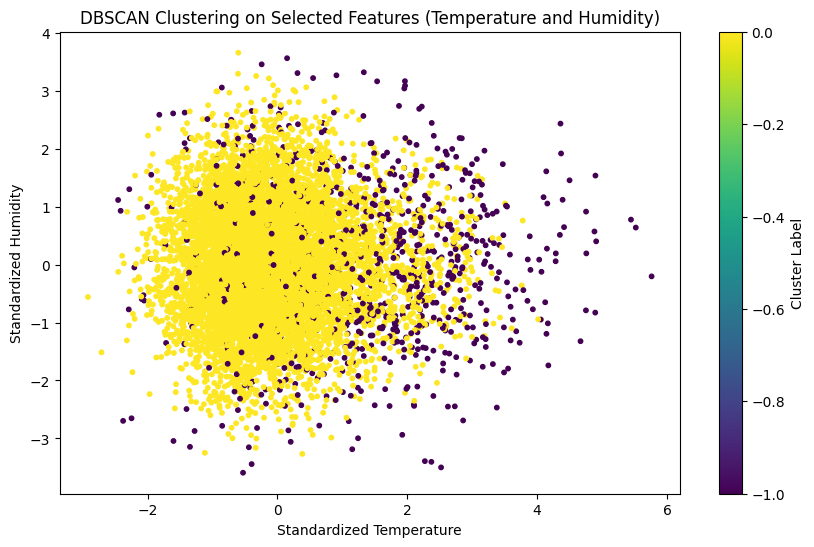

In [ ]:
# Visualize clustering on temperature and humidity
plt.figure(figsize=(10, 6))

# Scatter plot for temperature (scaled_features[:, 0]) and humidity (scaled_features[:, 1])
scatter = plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster Label')
plt.title('DBSCAN Clustering on Selected Features (Temperature and Humidity)')
plt.xlabel('Standardized Temperature')
plt.ylabel('Standardized Humidity')
plt.show()


In [ ]:
# Extract and display outliers
outliers = data[data['cluster'] == -1]
print(f"Number of outliers detected: {len(outliers)}")
outliers.head()


Number of outliers detected: 842


,timestamp,machine_id,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,...,day_of_week,month,shift,machine_type,machine_age,operator_id,material_type,cycle_time,days_since_last_maintenance,cluster
5,2024-12-01 00:00:50.160219,4,39.512549,42.074776,0.508264,39.936257,7.410551,52.123603,-0.392540,-1.225692,...,6,12,Night,TypeA,9,OP_3,Aluminum,154.250144,7,-1
18,2024-12-01 00:41:35.399528,3,52.441278,36.468285,0.681696,-54.581211,1.554501,-6.848785,2.738568,-9.939346,...,6,12,Night,TypeB,14,OP_4,Composite,90.301696,24,-1
29,2024-12-01 00:59:38.404526,4,26.760615,48.068035,0.135868,17.012246,115.508001,-2.246048,6.452671,16.220637,...,6,12,Night,TypeA,9,OP_1,Plastic,123.751173,9,-1
69,2024-12-01 02:50:54.207868,0,15.315252,43.822963,0.084233,-112.030585,65.973337,167.834353,4.111398,-11.109553,...,6,12,Night,TypeC,2,OP_2,Plastic,125.228746,9,-1
70,2024-12-01 04:39:41.955359,1,22.396343,68.744827,0.391005,-27.729468,12.423989,-112.474614,5.881222,0.203421,...,6,12,Night,TypeA,3,OP_2,Plastic,109.092009,1,-1


In [ ]:
# Specify the directory where you want to save the file
output_directory = "/content/drive/MyDrive/Colab Notebooks/Output"
output_file = f"{output_directory}/new_data_with_clusters.csv"

# Save the file
data.to_csv(output_file, index=False)

print(f"Clustered data saved to {output_file}")

Clustered data saved to /content/drive/MyDrive/Colab Notebooks/Output/new_data_with_clusters.csv


## Expert Classification

In [ ]:
# Update file path as per user instruction
train_file_path = '/content/drive/MyDrive/Colab Notebooks/Output/new_data_with_clusters.csv'

# Load the dataset
train_data = pd.read_csv(train_file_path)

def label_data(row):
    if (row['cluster'] == -1):
        # ow['temperature'] > 50 or  # Based on cluster -1 max thresholds
        # row['humidity'] > 60 or    # Slightly below cluster -1 max to allow room for noise
        # row['vibration'] > 1.0 or  # Threshold based on observed patterns in cluster analysis
        # row['gyro_x'] > 70 or row['gyro_y'] > 70 or row['gyro_z'] > 70 or
        # row['accel_x'] > 15 or row['accel_y'] > 15 or row['accel_z'] > 15 or
        # row['cycle_time'] > 200):  # Threshold for cycle_time based on patterns
        return 1  # Faulty
    return 0  # Normal

# Apply the labeling function
train_data['label'] = train_data.apply(label_data, axis=1)

# Save the labeled data
output_labeled_file = '/content/drive/MyDrive/Colab Notebooks/Output/labeled_new_data_with_clusters.csv'
train_data.to_csv(output_labeled_file, index=False)

labeled_data = pd.read_csv(output_labeled_file)

labeled_data.head()

,timestamp,machine_id,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,...,month,shift,machine_type,machine_age,operator_id,material_type,cycle_time,days_since_last_maintenance,cluster,label
0,2024-12-01 03:59:20.687595,1,10.756457,45.054128,0.124568,36.205334,65.404816,11.357421,-6.076538,-6.325126,...,12,Night,TypeA,3,OP_1,Aluminum,84.385989,25,0,0
1,2024-12-01 05:52:48.505225,3,13.754359,52.204922,0.157020,54.522527,-31.346199,-71.258711,1.574431,12.087429,...,12,Night,TypeB,14,OP_5,Plastic,176.664856,0,0,0
2,2024-12-01 02:33:53.146871,0,23.434186,50.910485,0.303358,-99.799619,23.847101,11.707200,-2.401870,-5.902201,...,12,Night,TypeC,2,OP_1,Steel,157.950294,21,0,0
3,2024-12-01 00:43:41.825482,8,12.118907,49.615172,0.147193,-81.591458,-32.330194,-60.217919,4.864684,2.012458,...,12,Night,TypeA,6,OP_5,Composite,120.474039,2,0,0
4,2024-12-01 03:42:33.359387,4,10.498815,59.046347,0.128689,-43.624825,-80.773166,73.738019,-6.093625,-2.533235,...,12,Night,TypeA,9,OP_5,Aluminum,120.474382,2,0,0


## Prepare to training dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the labeled dataset
labeled_file = '/content/drive/MyDrive/Colab Notebooks/Output/labeled_new_data_with_clusters.csv'
data = pd.read_csv(labeled_file)

# Separate features (X) and labels (y)
features = ['temperature', 'humidity', 'vibration', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z', 'cycle_time']
X = data[features]
y = data['label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shape of the resulting datasets
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (7840, 10)
Testing Features Shape: (1960, 10)
Training Labels Shape: (7840,)
Testing Labels Shape: (1960,)


## Training

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = classifier.predict(X_test_scaled)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained classifier (model)
model_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/fault_classifier_model.pkl'
joblib.dump(classifier, model_filename)
print(f"Model saved to {model_filename}")

# Save the scaler separately
scaler_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/scaler.save'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Model Accuracy: 0.9387755102040817

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1793
           1       0.77      0.40      0.53       167

    accuracy                           0.94      1960
   macro avg       0.86      0.70      0.75      1960
weighted avg       0.93      0.94      0.93      1960

Model saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/fault_classifier_model.pkl
Scaler saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/scaler.save


## Testing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Path to the saved model
model_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/fault_classifier_model.pkl'

# Load the trained model
classifier = joblib.load(model_file)

# Load new data (example file path)
new_data_file = 'dataset.csv'
new_data = pd.read_csv(new_data_file)

# Select features from the new data
features = ['temperature', 'humidity', 'vibration', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z', 'cycle_time']
X_new = new_data[features]

# Standardize the new data (using the scaler from training)
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Use the model to make predictions
predictions = classifier.predict(X_new_scaled)

# Add predictions to the new data
new_data['prediction'] = predictions

# Save the predicted data
output_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/testing_result2.csv'
new_data.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


Predictions saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/testing_result2.csv


In [ ]:
# Re-load the new data with predictions if necessary
output_file = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint2/testing_result2.csv'
new_data_with_predictions = pd.read_csv(output_file)

# Count the number of predictions with value 1
prediction_count = new_data_with_predictions['prediction'].value_counts().get(1, 0)

print(f"Number of faulty predictions (value 1): {prediction_count}")

Number of faulty predictions (value 1): 754


# Checkpoint 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dir = "/content/drive/MyDrive/Colab Notebooks/Dataset"

Mounted at /content/drive


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the synthetic data from the CSV file
data_file = drive_dir + "/dataset.csv"
data = pd.read_csv(data_file)

# Display the first few rows of the dataset
data.head()


,timestamp,machine_id,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,...,hour,day_of_week,month,shift,machine_type,machine_age,operator_id,material_type,cycle_time,days_since_last_maintenance
0,2024-12-01 03:59:20.687595,1,10.756457,45.054128,0.124568,36.205334,65.404816,11.357421,-6.076538,-6.325126,...,3,6,12,Night,TypeA,3,OP_1,Aluminum,84.385989,25
1,2024-12-01 05:52:48.505225,3,13.754359,52.204922,0.157020,54.522527,-31.346199,-71.258711,1.574431,12.087429,...,5,6,12,Night,TypeB,14,OP_5,Plastic,176.664856,0
2,2024-12-01 02:33:53.146871,0,23.434186,50.910485,0.303358,-99.799619,23.847101,11.707200,-2.401870,-5.902201,...,2,6,12,Night,TypeC,2,OP_1,Steel,157.950294,21
3,2024-12-01 00:43:41.825482,8,12.118907,49.615172,0.147193,-81.591458,-32.330194,-60.217919,4.864684,2.012458,...,0,6,12,Night,TypeA,6,OP_5,Composite,120.474039,2
4,2024-12-01 03:42:33.359387,4,10.498815,59.046347,0.128689,-43.624825,-80.773166,73.738019,-6.093625,-2.533235,...,3,6,12,Night,TypeA,9,OP_5,Aluminum,120.474382,2


In [ ]:
# Select relevant features for clustering (excluding non-numeric or categorical columns)
features = data[['temperature', 'humidity', 'vibration', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z', 'cycle_time', 'machine_age', 'days_since_last_maintenance']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display standardized features
pd.DataFrame(scaled_features, columns=features.columns).head()


,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,cycle_time,machine_age,days_since_last_maintenance
0,-1.215205,-0.493674,-0.421664,0.736404,1.283455,0.232091,-1.205977,-1.271085,0.753620,-1.222891,-1.383186,1.212617
1,-0.859546,0.218583,-0.182488,1.104579,-0.620186,-1.417766,0.315450,2.420147,-0.443696,1.817191,1.423648,-1.661856
2,0.288832,0.089651,0.896048,-1.997298,0.465779,0.239076,-0.475254,-1.186300,-1.308200,1.200649,-1.638353,0.752701
3,-1.053569,-0.039369,-0.254908,-1.631314,-0.639547,-1.197280,0.969730,0.400381,-0.760041,-0.033988,-0.617686,-1.431898
4,-1.245771,0.900026,-0.391288,-0.868184,-1.592695,1.477841,-1.209375,-0.510911,-0.952574,-0.033977,0.147814,-1.431898


In [ ]:
# Apply DBSCAN
eps = 2.0  # Slightly higher based on likely increased variability in anomalies
min_samples = 10 # Adjusted to consider the structured conditional anomalies
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the original data
data['cluster'] = clusters

# Display the distribution of clusters
data['cluster'].value_counts()


,count
cluster,
0,6866
-1,2934


In [ ]:
# Extract and display outliers
outliers = data[data['cluster'] == -1]
print(f"Number of outliers detected: {len(outliers)}")
outliers.head()


Number of outliers detected: 2934


,timestamp,machine_id,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,...,day_of_week,month,shift,machine_type,machine_age,operator_id,material_type,cycle_time,days_since_last_maintenance,cluster
1,2024-12-01 05:52:48.505225,3,13.754359,52.204922,0.157020,54.522527,-31.346199,-71.258711,1.574431,12.087429,...,6,12,Night,TypeB,14,OP_5,Plastic,176.664856,0,-1
2,2024-12-01 02:33:53.146871,0,23.434186,50.910485,0.303358,-99.799619,23.847101,11.707200,-2.401870,-5.902201,...,6,12,Night,TypeC,2,OP_1,Steel,157.950294,21,-1
5,2024-12-01 00:00:50.160219,4,39.512549,42.074776,0.508264,39.936257,7.410551,52.123603,-0.392540,-1.225692,...,6,12,Night,TypeA,9,OP_3,Aluminum,154.250144,7,-1
14,2024-12-01 00:26:19.144137,8,26.260896,57.127278,0.224975,-59.414791,3.994456,10.433617,-0.772523,11.518318,...,6,12,Night,TypeA,6,OP_5,Aluminum,132.258282,0,-1
18,2024-12-01 00:41:35.399528,3,52.441278,36.468285,0.681696,-54.581211,1.554501,-6.848785,2.738568,-9.939346,...,6,12,Night,TypeB,14,OP_4,Composite,90.301696,24,-1


In [ ]:
# Specify the directory where you want to save the file
output_directory = "/content/drive/MyDrive/Colab Notebooks/Output"
output_file = f"{output_directory}/cp2_with_clusters.csv"

# Save the file
data.to_csv(output_file, index=False)

print(f"Clustered data saved to {output_file}")

Clustered data saved to /content/drive/MyDrive/Colab Notebooks/Output/cp2_with_clusters.csv


In [ ]:
# Update file path as per user instruction
train_file_path = '/content/drive/MyDrive/Colab Notebooks/Output/cp2_with_clusters.csv'

# Load the dataset
train_data = pd.read_csv(train_file_path)

def label_data(row):
    if (row['cluster'] == -1):
        # ow['temperature'] > 50 or  # Based on cluster -1 max thresholds
        # row['humidity'] > 60 or    # Slightly below cluster -1 max to allow room for noise
        # row['vibration'] > 1.0 or  # Threshold based on observed patterns in cluster analysis
        # row['gyro_x'] > 70 or row['gyro_y'] > 70 or row['gyro_z'] > 70 or
        # row['accel_x'] > 15 or row['accel_y'] > 15 or row['accel_z'] > 15 or
        # row['cycle_time'] > 200):  # Threshold for cycle_time based on patterns
        return 1  # Faulty
    return 0  # Normal

# Apply the labeling function
train_data['label'] = train_data.apply(label_data, axis=1)

# Save the labeled data
output_labeled_file = '/content/drive/MyDrive/Colab Notebooks/Output/labeled_new_datacp2_with_clusters.csv'
train_data.to_csv(output_labeled_file, index=False)

labeled_data = pd.read_csv(output_labeled_file)

labeled_data.head()

,timestamp,machine_id,temperature,humidity,vibration,gyro_x,gyro_y,gyro_z,accel_x,accel_y,...,month,shift,machine_type,machine_age,operator_id,material_type,cycle_time,days_since_last_maintenance,cluster,label
0,2024-12-01 03:59:20.687595,1,10.756457,45.054128,0.124568,36.205334,65.404816,11.357421,-6.076538,-6.325126,...,12,Night,TypeA,3,OP_1,Aluminum,84.385989,25,0,0
1,2024-12-01 05:52:48.505225,3,13.754359,52.204922,0.157020,54.522527,-31.346199,-71.258711,1.574431,12.087429,...,12,Night,TypeB,14,OP_5,Plastic,176.664856,0,-1,1
2,2024-12-01 02:33:53.146871,0,23.434186,50.910485,0.303358,-99.799619,23.847101,11.707200,-2.401870,-5.902201,...,12,Night,TypeC,2,OP_1,Steel,157.950294,21,-1,1
3,2024-12-01 00:43:41.825482,8,12.118907,49.615172,0.147193,-81.591458,-32.330194,-60.217919,4.864684,2.012458,...,12,Night,TypeA,6,OP_5,Composite,120.474039,2,0,0
4,2024-12-01 03:42:33.359387,4,10.498815,59.046347,0.128689,-43.624825,-80.773166,73.738019,-6.093625,-2.533235,...,12,Night,TypeA,9,OP_5,Aluminum,120.474382,2,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the labeled dataset
labeled_file = '/content/drive/MyDrive/Colab Notebooks/Output/labeled_new_datacp2_with_clusters.csv'
data = pd.read_csv(labeled_file)

# Separate features (X) and labels (y)
features = ['temperature', 'humidity', 'vibration', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x', 'accel_y', 'accel_z', 'cycle_time', 'machine_age', 'days_since_last_maintenance']
X = data[features]
y = data['label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shape of the resulting datasets
print("Training Features Shape:", X_train_scaled.shape)
print("Testing Features Shape:", X_test_scaled.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (7840, 12)
Testing Features Shape: (1960, 12)
Training Labels Shape: (7840,)
Testing Labels Shape: (1960,)


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = classifier.predict(X_test_scaled)

# Print accuracy and classification report
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the trained classifier (model)
model_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint3/fault_classifier_model.pkl'
joblib.dump(classifier, model_filename)
print(f"Model saved to {model_filename}")

# Save the scaler separately
scaler_filename = '/content/drive/MyDrive/Colab Notebooks/Output/Checkpoint3/scaler.save'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")


Model Accuracy: 0.8785714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1336
           1       0.86      0.74      0.80       624

    accuracy                           0.88      1960
   macro avg       0.87      0.84      0.85      1960
weighted avg       0.88      0.88      0.88      1960

Model saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint3/fault_classifier_model.pkl
Scaler saved to /content/drive/MyDrive/Colab Notebooks/Output/Checkpoint3/scaler.save
